# Part I - (Flight Data Exploratory Data Analysis)
## by Jeremiah Tindana

## Introduction
> Have you ever been forced to wait in an airport after your flight was canceled or delayed? Have you wondered whether you could have predicted such a happenstance and avoided it? 
This analysis is carried out on a flight dataset from 1987. You will find out graphically what factors are most likely to result in flight delay and or cancellation.



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Import data set and take a first look
df = pd.read_csv('2007.csv')
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,1,1,1,1232.0,1225,1341.0,1340,WN,2891,...,4,11,0,NaN,0,0,0,0,0,0
1,2007,1,1,1,1918.0,1905,2043.0,2035,WN,462,...,5,6,0,NaN,0,0,0,0,0,0
2,2007,1,1,1,2206.0,2130,2334.0,2300,WN,1229,...,6,9,0,NaN,0,3,0,0,0,31
3,2007,1,1,1,1230.0,1200,1356.0,1330,WN,1355,...,3,8,0,NaN,0,23,0,0,0,3
4,2007,1,1,1,831.0,830,957.0,1000,WN,2278,...,3,9,0,NaN,0,0,0,0,0,0


In [3]:
#Dimension of the data
df.shape

(7453215, 29)

In [5]:
#Get the columns of the data
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

### Structure of the Dataset
> The dataset is fairly large with almost 7.5 million rows and 29 features (columns).

* `Year`: This data set was captured for the 2007
* `Month`: Some amount of data is captured for every month in  the year 2007. 1 represents January, 2 represents February, and in that order.
* `DayofMonth`: Captures the specific day from 1st to 31st.
* `DayOfWeek`: 1 represents Monday, and 7 represents Sunday
* `DepTime`: Actual departure time in hh:mm
* `CRSDepTime`: Scheduled departure time in hh:mm
* `ArrTime`: Actual arrival time in hh:mm
* `CRSArrTime`: Scheduled arrival time in hh:mm
* `UniqueCarrier`: Unique carrier code
* `FlightNum`: Flight number
* `TailNum`: Plane tail number
* `ActualElapsedTime`: Actual elapsed time in minutes
* `CRSElapsedTime`: Scheduled elapsed time in minutes
* `AirTime`: Air time in minutes
* `ArrDelay`: Arrival delay in minutes
* `DepDelay`: Departure delay in minutes
* `Origin`: Origin IATA airport code
* `Dest`: Destination IATA airport code
* `Distance`: Distance in miles
* `TaxiIn`: Taxi in time in minutes
* `TaxiOut`: Taxi out time in minutes
* `Cancelled`: States whether the flight was cancelled
* `CancellationCode`: Reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
* `Diverted`: Captures whether flight was diverted. 1 = yes, 0 = no
* `CarrierDelay`: Carrier delay in minutes
* `WeatherDelay`: Weather delay in minutes
* `NASDelay`: NAS delay in minutes
* `SecurityDelay`: Security delay in minutes
* `LateAircraftDelay`: Late aircraft delay in minutes


### Features of interest in the dataset

> `UniqueCareer` is a major feature of interest for this exploration.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> **Month, Day of week, Origin, Dest, Cancelled, CancellationCode**

#### Visual Assessment

In [6]:
#A visual look at the data
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,1,1,1,1232.0,1225,1341.0,1340,WN,2891,...,4,11,0,NaN,0,0,0,0,0,0
1,2007,1,1,1,1918.0,1905,2043.0,2035,WN,462,...,5,6,0,NaN,0,0,0,0,0,0
2,2007,1,1,1,2206.0,2130,2334.0,2300,WN,1229,...,6,9,0,NaN,0,3,0,0,0,31
3,2007,1,1,1,1230.0,1200,1356.0,1330,WN,1355,...,3,8,0,NaN,0,23,0,0,0,3
4,2007,1,1,1,831.0,830,957.0,1000,WN,2278,...,3,9,0,NaN,0,0,0,0,0,0
5,2007,1,1,1,1430.0,1420,1553.0,1550,WN,2386,...,2,7,0,NaN,0,0,0,0,0,0
6,2007,1,1,1,1936.0,1840,2217.0,2130,WN,409,...,5,7,0,NaN,0,46,0,0,0,1
7,2007,1,1,1,944.0,935,1223.0,1225,WN,1131,...,4,9,0,NaN,0,0,0,0,0,0
8,2007,1,1,1,1537.0,1450,1819.0,1735,WN,1212,...,5,7,0,NaN,0,20,0,0,0,24
9,2007,1,1,1,1318.0,1315,1603.0,1610,WN,2456,...,5,8,0,NaN,0,0,0,0,0,0


#### Programmatic Assessment

In [7]:
#A look at data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7453215 entries, 0 to 7453214
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               int64
TaxiOut              int64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         int64
WeatherDelay         int64
NASDelay             int64
SecurityDelay        int64
LateAircraftDelay    int64
dtypes: float64(7), int64(17), object(5)
memory usage: 1.6+ GB


In [8]:
#Descriptive statistics
df.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,7453215.0,7.453215e+06,7.453215e+06,7.453215e+06,7.292467e+06,7.453215e+06,7.275288e+06,7.453215e+06,7.453215e+06,7.275288e+06,...,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06
mean,2007.0,6.514876e+00,1.572589e+01,3.933804e+00,1.339221e+03,1.330596e+03,1.482105e+03,1.495392e+03,2.188099e+03,1.263223e+02,...,7.198058e+02,6.691984e+00,1.630015e+01,2.156761e-02,2.304911e-03,3.865236e+00,7.700904e-01,3.783702e+00,2.373553e-02,5.099134e+00
std,0.0,3.425117e+00,8.781154e+00,1.992267e+00,4.798528e+02,4.647080e+02,5.072241e+02,4.815902e+02,1.971958e+03,7.118009e+01,...,5.623051e+02,5.151351e+00,1.183396e+01,1.452668e-01,4.795413e-02,2.084240e+01,9.619547e+00,1.617670e+01,1.084995e+00,2.127753e+01
min,2007.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.200000e+01,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2007.0,4.000000e+00,8.000000e+00,2.000000e+00,9.300000e+02,9.300000e+02,1.107000e+03,1.115000e+03,5.900000e+02,7.600000e+01,...,3.190000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2007.0,7.000000e+00,1.600000e+01,4.000000e+00,1.329000e+03,1.322000e+03,1.513000e+03,1.520000e+03,1.509000e+03,1.080000e+02,...,5.690000e+02,5.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2007.0,9.000000e+00,2.300000e+01,6.000000e+00,1.733000e+03,1.720000e+03,1.911000e+03,1.906000e+03,3.553000e+03,1.560000e+02,...,9.460000e+02,8.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2007.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.602000e+03,1.270000e+03,...,4.962000e+03,5.450000e+02,5.300000e+02,1.000000e+00,1.000000e+00,2.580000e+03,1.429000e+03,1.386000e+03,3.820000e+02,1.031000e+03


In [9]:
#check for duplicates
df.duplicated().sum()

27

In [12]:
#Count of year values
df.Year.value_counts()

2007    7453215
Name: Year, dtype: int64

In [13]:
#Count of Month values
df.Month.value_counts()

8     653279
7     648560
3     639209
5     631609
10    629992
6     629280
1     621559
4     614648
12    614139
11    605149
9     600187
2     565604
Name: Month, dtype: int64

In [14]:
#Count of Day of Month values
df.DayofMonth.value_counts()

26    250136
19    250092
12    249773
16    249034
9     248415
5     247601
18    247504
11    246729
21    246331
20    246248
14    246040
7     246027
15    245071
23    244777
2     244675
25    244583
13    244527
6     244031
8     244003
28    243524
4     243258
27    242558
17    242535
1     242184
10    241917
24    240219
3     239773
22    239629
30    226752
29    224309
31    140960
Name: DayofMonth, dtype: int64

In [15]:
#Count of Origin values
df.Origin.value_counts()

ATL    413851
ORD    375784
DFW    297345
DEN    240928
LAX    237597
PHX    211072
IAH    200420
LAS    183668
DTW    177478
MSP    155846
EWR    154113
SLC    147808
SFO    138491
MCO    129778
BOS    128320
CLT    127108
JFK    126366
LGA    122899
CVG    110509
BWI    109385
SEA    109127
PHL    104063
SAN     97316
MDW     95863
IAD     91048
DCA     89666
MEM     85034
TPA     79785
CLE     78288
OAK     74938
        ...  
SUX       534
PLN       512
STX       479
ILG       455
YKM       410
SLE       398
PMD       392
BPT       364
ACK       314
CMX       309
ALO       300
HTS       279
WYS       266
AKN       235
ROW       235
RHI       223
INL       218
TEX       216
SOP       195
LWB       187
DLG       175
BJI       128
MTH       128
ADK       103
GST        90
EAU        72
ISO         9
PIR         4
GLH         2
MKC         1
Name: Origin, Length: 304, dtype: int64

In [16]:
#Count of Unique Carrier values
df.UniqueCarrier.value_counts()

WN    1168871
AA     633857
OO     597882
MQ     540494
UA     490002
US     485447
DL     475889
XE     434773
NW     414526
CO     323151
YV     294362
EV     286234
FL     263159
9E     258851
OH     233787
B6     191450
AS     160185
F9      97760
HA      56175
AQ      46360
Name: UniqueCarrier, dtype: int64

In [17]:
#Count of Cancelled flights
df.Cancelled.value_counts()

0    7292467
1     160748
Name: Cancelled, dtype: int64

#### 1. Drop duplicated values
#### 2. Convert certain int data types to strings (Month, DayofMonth, DayOfWeek, Diverted)

In [18]:
#Copy data set to wrangle 
df_copy = df.copy()
df_copy.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,1,1,1,1232.0,1225,1341.0,1340,WN,2891,...,4,11,0,NaN,0,0,0,0,0,0
1,2007,1,1,1,1918.0,1905,2043.0,2035,WN,462,...,5,6,0,NaN,0,0,0,0,0,0
2,2007,1,1,1,2206.0,2130,2334.0,2300,WN,1229,...,6,9,0,NaN,0,3,0,0,0,31
3,2007,1,1,1,1230.0,1200,1356.0,1330,WN,1355,...,3,8,0,NaN,0,23,0,0,0,3
4,2007,1,1,1,831.0,830,957.0,1000,WN,2278,...,3,9,0,NaN,0,0,0,0,0,0


**Define** : Drop duplicates

**Code**

In [19]:
#Drop duplicates
df_copy = df.drop_duplicates()

**Test**

In [20]:
#Check for duplicates
df_copy.duplicated().sum()

0

**Define**: Convert certain int data types to strings (Month, DayofMonth, DayOfWeek, Diverted)

**Code**

In [21]:
#Convert to object data types
df_copy.Month= df_copy.Month.astype('object')
df_copy.DayofMonth= df_copy.DayofMonth.astype('object')
df_copy.DayOfWeek= df_copy.DayOfWeek.astype('object')
df_copy.Diverted= df_copy.Diverted.astype('object')

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


#### Test

In [22]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7453188 entries, 0 to 7453214
Data columns (total 29 columns):
Year                 int64
Month                object
DayofMonth           object
DayOfWeek            object
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               int64
TaxiOut              int64
Cancelled            int64
CancellationCode     object
Diverted             object
CarrierDelay         int64
WeatherDelay         int64
NASDelay             int64
SecurityDelay        int64
LateAircraftDelay    int64
dtypes: float64(7), int64(13), object(9)
memory usage: 1.7+ GB


In [23]:
#Save wrangled copy to a dataframe
df_copy.to_csv('dff.csv', index = False)

In [24]:
dff = df_copy.copy()

In [25]:
#A look at the datatypes of the new data
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7453188 entries, 0 to 7453214
Data columns (total 29 columns):
Year                 int64
Month                object
DayofMonth           object
DayOfWeek            object
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               int64
TaxiOut              int64
Cancelled            int64
CancellationCode     object
Diverted             object
CarrierDelay         int64
WeatherDelay         int64
NASDelay             int64
SecurityDelay        int64
LateAircraftDelay    int64
dtypes: float64(7), int64(13), object(9)
memory usage: 1.7+ GB


In [26]:
#Visual of the first 5 rows
dff.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,1,1,1,1232.0,1225,1341.0,1340,WN,2891,...,4,11,0,NaN,0,0,0,0,0,0
1,2007,1,1,1,1918.0,1905,2043.0,2035,WN,462,...,5,6,0,NaN,0,0,0,0,0,0
2,2007,1,1,1,2206.0,2130,2334.0,2300,WN,1229,...,6,9,0,NaN,0,3,0,0,0,31
3,2007,1,1,1,1230.0,1200,1356.0,1330,WN,1355,...,3,8,0,NaN,0,23,0,0,0,3
4,2007,1,1,1,831.0,830,957.0,1000,WN,2278,...,3,9,0,NaN,0,0,0,0,0,0


## Univariate Exploration

> The following questions are to be answered in this section
1. How are flight numbers distributed during the year in each month?
2. How are flight numbers distributed during a month?
3. How are flight numbers distributed during the week?
4. How are flight numbers distributed among Unique Carriers?
5. Which is the most frequent cause of delay?




#### Question: How are flight numbers distributed during the year in each month?

#### Visualization

In [27]:
#get indeces
order = dff.Month.value_counts().index

Text(0.5,1,'Count of flights in each month')

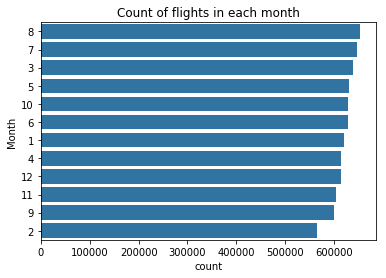

In [29]:
#select first color from seaborn color palette
base_color = sb.color_palette()[0]

#function for barchart plotting
def sbplot(feature,order):
    sb.countplot(data=dff, y=feature, color=base_color, order=order);

#plot Month
sbplot(dff.Month,order)
plt.title('Count of flights in each month')

#### Observation
Flight numbers can be observed. August has the lead, while February has the least number of flights.

#### Question: How are flight numbers distributed during a month?

Text(0.5,1,'Count of flights for each day of the month')

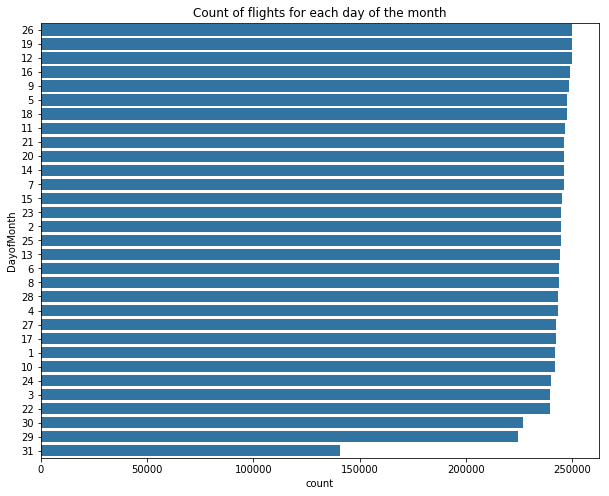

In [30]:
#Plot for days within a month
order_m = dff.DayofMonth.value_counts().index
plt.figure(figsize=[10,8])
sbplot(dff.DayofMonth,order_m)
plt.title('Count of flights for each day of the month')

#### Observation
The last day of the month has significantly less number of flights

#### Question: How are flight numbers distributed during the week?

#### Visualization

Text(0.5,1,'Count of flights for each day of the month')

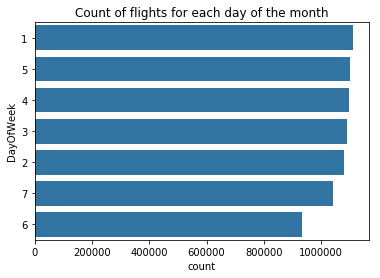

In [31]:
#plot for days of the week
order_w = dff.DayOfWeek.value_counts().index
sbplot(dff.DayOfWeek,order_w)
plt.title('Count of flights for each day of the month')

#### Observation
Weekends have fewer flights than weekdays. Mondays have the most flights

#### Question: How are flight numbers distributed among Unique Carriers?

#### Visualization

Text(0.5,1,'Count of flights for each Carrier')

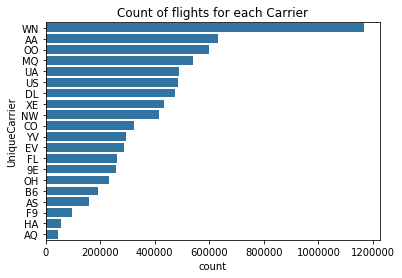

In [32]:
#plot for Unique carriers flights
order_u = dff.UniqueCarrier.value_counts().index
sbplot(dff.UniqueCarrier,order_u)
plt.title('Count of flights for each Carrier')

#### Observation
WN airlines have significantly more customers than the other airlines. We can visualize the proportions

Text(0.5,0,'Proportions for airlines')

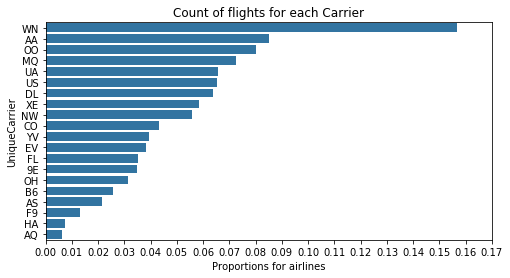

In [33]:
#Plot relative frequencies of Unique Carriers
order_un = dff.UniqueCarrier.value_counts()
sum_unique = dff.UniqueCarrier.value_counts().sum()
max_unique = order_un[0]
max_prop = max_unique/sum_unique

#create list of string values for for tick labels 
tick_props = np.arange(0,max_prop+0.02, 0.01)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

plt.figure(figsize=[8,4]) #Adjust figure size
sbplot(dff.UniqueCarrier,order_u)
plt.title('Count of flights for each Carrier')
plt.xticks(tick_props*sum_unique, tick_names)
plt.xlabel('Proportions for airlines')

#### Observation
Almost 16% of all flights are carried by WN airlines, HA and AQ each have less than 1%

#### Question: Which is the most frequent cause of delay?

#### Visualization

In [34]:
# A = carrier, B = weather, C = NAS, D = security
dff.CancellationCode.value_counts()

A    66779
B    61936
C    31995
D       39
Name: CancellationCode, dtype: int64

Text(0.5,1,'Delay causes')

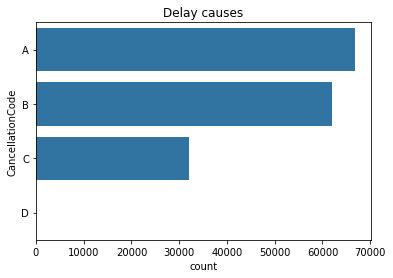

In [35]:
#Plot cancellation codes
order_c = dff.CancellationCode.value_counts().index
sbplot(dff.CancellationCode,order_c)
plt.title('Delay causes')

Visualizing the proportions will bring out the distribution more clearly, especially for D.

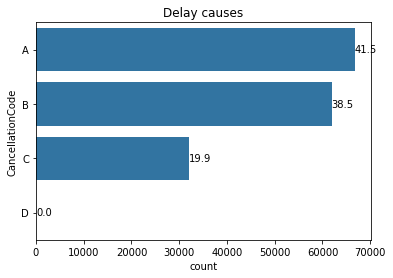

In [36]:
# Plot proportions
order_c = dff.CancellationCode.value_counts().index
order_cp = dff.CancellationCode.value_counts()
sum_causes = dff.CancellationCode.value_counts().sum()

sbplot(dff.CancellationCode,order_c)
plt.title('Delay causes')

# Logic to print proportions on bars
for i in range(order_cp.shape[0]):
    count = order_cp[i]
    pct_string = '{:0.01f}'.format(100*count/sum_causes)
    plt.text(count+1,i,pct_string,va='center')

#### Observation
41% of delays are carrier delays, 38.5% are caused by weather, and 19.9% are NAS. A very negligible percentage (about 0.1%) is caused by security issues.

#### Question: Which Destination receives the most flights?

#### Visualization

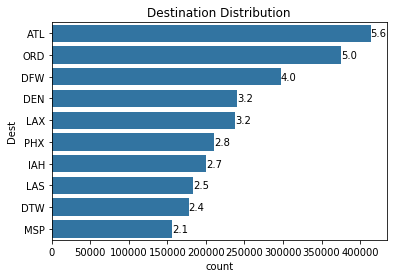

In [66]:
#plot destination proportions
order_d= dff.Dest.value_counts().index[0:10]
order_dp= dff.Dest.value_counts()[0:10]
sum_causes = dff.Dest.value_counts().sum()

sbplot(dff.Dest,order_d)
plt.title('Destination Distribution')

# Logic to print proportions on bars
for i in range(order_dp.shape[0]):
    count = order_dp[i]
    pct_string = '{:0.01f}'.format(100*count/sum_causes)
    plt.text(count+1,i,pct_string,va='center')

#### Observation
ATL receives the highest proportion of flights at 5.6%

#### Question: Which Origin receives the most flights?

#### Visualization

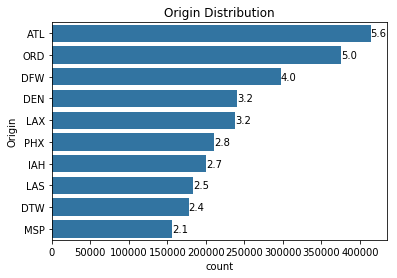

In [68]:
#Plot proportions
order_o = dff.Origin.value_counts().index[0:10]
order_op = dff.Origin.value_counts()[0:10]
sum_causes = dff.Origin.value_counts().sum()

sbplot(dff.Origin,order_o)
plt.title('Origin Distribution')

# Logic to print proportions on bars
for i in range(order_op.shape[0]):
    count = order_op[i]
    pct_string = '{:0.01f}'.format(100*count/sum_causes)
    plt.text(count+1,i,pct_string,va='center')

#### Observation
ATL has the most originating flights.

### Summary of Univariate Exploration

> The variables of interest in this section were `Month, DayofMonth, DayOfWeek, UniqueCarriers, CancellationCode`.
These were used to answer the following questions
* How are flight numbers distributed during the year in each month?
* How are flight numbers distributed during a month?
* How are flight numbers distributed during the week?
* How are flight numbers distributed among Unique Carriers?
* Which is the most frequent cause of delay?
* Which Destination receives the most flights?
* Which Origin receives the most flights?

> It was observed that
1. February has the least number of flights in a year
2. The last day of the month has significantly less number of flights
3. The last day of the month has significantly less number of flights
4. Almost 16% of all flights are carried by WN airlines.
5. 41% of delays are carrier delays, 38.5% are caused by weather, and 19.9% are NAS. 
A very negligible percentage (about 0.1%) is caused by security issues.
6. ATL has the most flights originating and arriving. 

### Unusual Distributions

> The features considered in the univariate exploration appeared to be normal, 
and no unusual features were noticed. Hence, no transformations were made to the data.

## Bivariate Exploration


#### Question: Which airlines have the most cancelled flights?

#### Observation
There appears to be no correlation between Cancelled Flights and Unique Carriers. This can be explained by the categorical nature of the `Cancelled` feature. We can investigate further.

Text(0.5,1,'Bar plot of Cancelled flights and Flight Carriers')

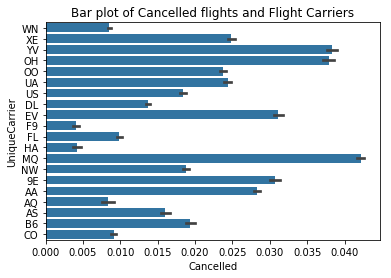

In [38]:
#barplot
sb.barplot(data=dff, x='Cancelled', y='UniqueCarrier', color=base_color)
plt.title('Bar plot of Cancelled flights and Flight Carriers')

#### Observation
Even though WN airlines have the highest customers, they have one of the least number of cancelled flights. MQ, YV and OH airlines have many cancelled flights

#### Question: Which airlines have the most diverted flights?

#### Visualization

Text(0.5,1,'Bar plot of Diverted flights and Flight Carriers')

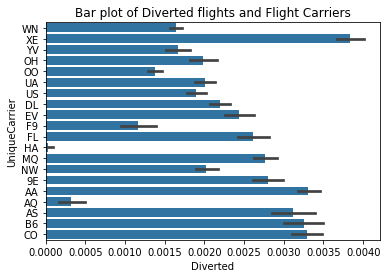

In [41]:
#barplot
sb.barplot(data=dff, x='Diverted', y='UniqueCarrier', color=base_color)
plt.title('Bar plot of Diverted flights and Flight Carriers')

#### Observation
XE has the most diverted flights

#### Question: Which carriers have more of which delays?

#### Visualization

Text(0.5,1,'Bar plot of Diverted flights and Flight Carriers')

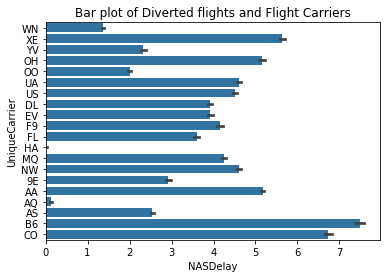

In [42]:
#barplot
sb.barplot(data=dff, x='NASDelay', y='UniqueCarrier', color=base_color)
plt.title('Bar plot of Diverted flights and Flight Carriers')

#### Observation
B6 and CO the most NAS delays

Text(0.5,1,'Bar plot of Carrier Delay and Flight Carriers')

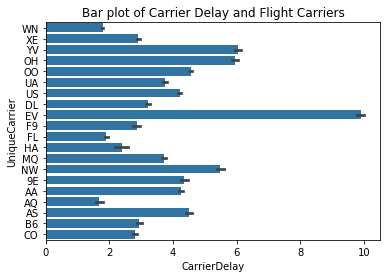

In [48]:
#barplot
sb.barplot(data=dff, x='CarrierDelay', y='UniqueCarrier', color=base_color)
plt.title('Bar plot of Carrier Delay and Flight Carriers')

#### Observation
EV airline has the highest number of carrier delays

Text(0.5,1,'Bar plot of Weather Delay flights and Flight Carriers')

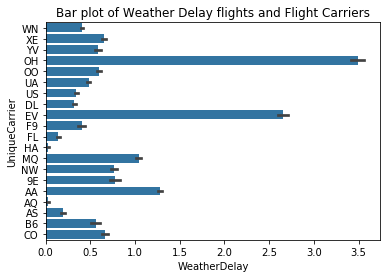

In [49]:
#barplot
sb.barplot(data=dff, x='WeatherDelay', y='UniqueCarrier', color=base_color)
plt.title('Bar plot of Weather Delay flights and Flight Carriers')

#### Observation

Text(0.5,1,'Bar plot of Security Delay flights and Flight Carriers')

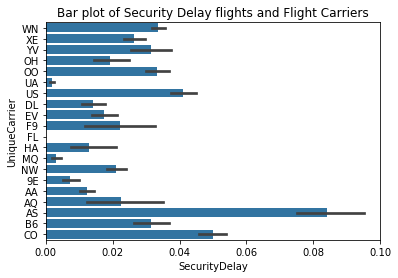

In [50]:
#barplot
sb.barplot(data=dff, x='SecurityDelay', y='UniqueCarrier', color=base_color)
plt.title('Bar plot of Security Delay flights and Flight Carriers')

#### Observation
AS Airline has th highest number of security delays

Text(0.5,1,'Bar plot of Late Aircraft Delay flights and Flight Carriers')

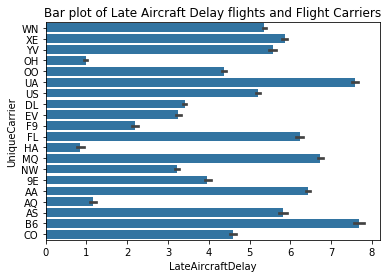

In [51]:
#barplot
sb.barplot(data=dff, x='LateAircraftDelay', y='UniqueCarrier', color=base_color)
plt.title('Bar plot of Late Aircraft Delay flights and Flight Carriers')

#### Observation
Quite a number of airlines have a lot of aircraft delays. UA and B6 have the highest.

### Summary of Bivariate Exploration

> Questions
1. Which airlines have the most cancelled flights?
2. Which airlines have the most diverted flights?
3. Which carriers have more of which delays?

> Observations
* Even though WN airlines have the highest customers, they have one of the least number of cancelled flights. MQ, YV and OH airlines have many cancelled flights
* XE has the most diverted flights
* B6 and CO the most NAS delays
* EV airline has the highest number of carrier delays
* AS Airline has th highest number of security delays
* Quite a number of airlines have a lot of aircraft delays. UA and B6 have the highest.

### Interesting feature of interest
* Even though WN airlines had the highest patronage, we see that their number of cancelled flights were few. This could be further insight into the reason for their high patronage. This could infer that higher number of cancelled flights affects the patronage of airlines. However, studying WN airlines alone is not enough to arrive at such a conclusion.

## Multivariate Exploration

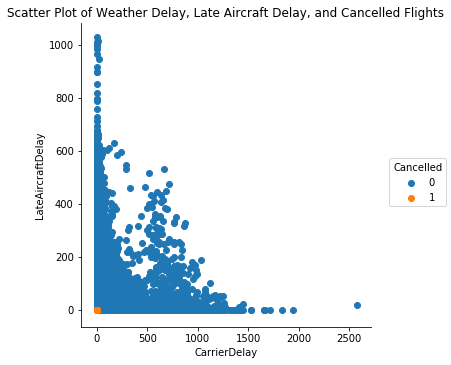

In [4]:
#plot a scatter for correlation between delays and cancelled flights
g = sb.FacetGrid(data = dff, hue = 'Cancelled', size = 5)
g.map(plt.scatter, 'CarrierDelay','LateAircraftDelay')
g.add_legend()
    
plt.title('Scatter Plot of Weather Delay, Late Aircraft Delay, and Cancelled Flights');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The multivariate visualization above captures the relationship between Carrier Delay, Late Aircraft Delay and whether or not flights were cancelled. Cancelled flights did not have any of these delays. Flights that were delayed by these factors eventually took off. 

### Interesting Observation
> Carrier Delays and Late Aircraft Delays are not the cause of cancelled flights.

## Conclusions
1. February has the least number of flights in a year
2. The last day of the month has significantly less number of flights
3. The last day of the month has significantly less number of flights
4. Almost 16% of all flights are carried by WN airlines.
5. 41% of delays are carrier delays, 38.5% are caused by weather, and 19.9% are NAS. 
A very negligible percentage (about 0.1%) is caused by security issues.
6. ATL has the most flights originating and arriving.
7. Even though WN airlines have the highest customers, they have one of the least number of cancelled flights. MQ, YV and OH airlines have many cancelled flights
8. XE has the most diverted flights
9. B6 and CO the most NAS delays
10. EV airline has the highest number of carrier delays
11. AS Airline has th highest number of security delays
12. Quite a number of airlines have a lot of aircraft delays. UA and B6 have the highest.
13. Carrier Delays and Late Aircraft Delays are not the cause of cancelled flights.